# Survival on the Titanic

This report investigates the data included in the dataset titanic_data.csv, downloaded from [Udacity](https://www.udacity.com/)  for the final project of the [Intro to Data Analysis](https://www.udacity.com/course/intro-to-data-analysis--ud170) course.

The purpose of this report is to investigate which factors contributed to the passengers' likelihood to survive. The factors that were investigated include:
- Ticket class
- Sex
- Age
- Number of siblings/ spouses aboard
- Number of parents/ children aboard
- Passenger fare
- Port of embarkation

For more detailed information on the dataset please visit [Kaggle](https://www.kaggle.com/c/titanic/data), which is where Udacity obtained the data.

In order to perform this analysis, the guide written by Susan Li on [Medium](https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8) was used as a reference.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

## Load Data from CSV

In [2]:
# Read in the data from titanic_data.csv and store it in the variable 'titanic'
titanic = pd.read_csv('titanic_data.csv', usecols=['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'])

titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [3]:
# Check missing values
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [4]:
# Calculate mean age by Pclass
titanic.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [5]:
# Function to estimate age for missing age values in data based on Pclass
def estimate_age(data):
    age = data[0]
    pclass = data[1]
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 30
        elif pclass == 3:
            return 25
    else:
        return age
    
titanic['Age'] = titanic[['Age', 'Pclass']].apply(estimate_age, axis=1)
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [6]:
# Remove data rows with missing Embarked data
titanic.dropna(inplace=True)
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Investigating the Data

In [7]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.218414,0.524184,0.382452,32.096681
std,0.486260,0.834700,13.178017,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


0    549
1    340
Name: Survived, dtype: int64


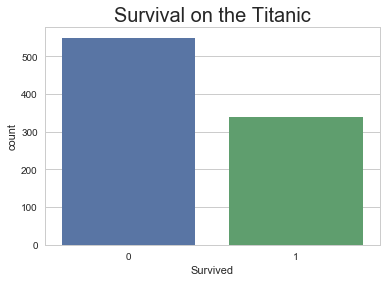

In [8]:
# A look at total number survived (1) vs. did not survive (0)
print(titanic['Survived'].value_counts())

ax = sns.countplot(x='Survived', data=titanic)
ax.set_title('Survival on the Titanic', fontsize=20)
plt.show()

In [9]:
# Group the passengers by survival outcome and look at the mean of numerical variables
titanic_by_survival = titanic.groupby('Survived')

titanic_by_survival.mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,29.787796,0.553734,0.329690,22.117887
1,1.955882,28.299029,0.476471,0.467647,48.209498


In [35]:
# Proportion of males and females survived vs did not survive
table_sex = pd.crosstab(titanic.Survived, titanic.Sex)
table_sex_prop = table_sex.div(table_sex.sum(1), axis=0)
table_sex_prop

Sex,female,male
Survived,,
0,0.147541,0.852459
1,0.679412,0.320588


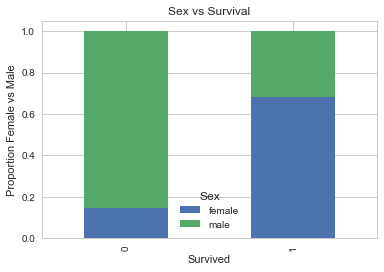

In [36]:
# Stacked barplot
table_sex_prop.plot.bar(stacked=True)
plt.title('Sex vs Survival')
plt.ylabel('Proportion Female vs Male')
plt.show()

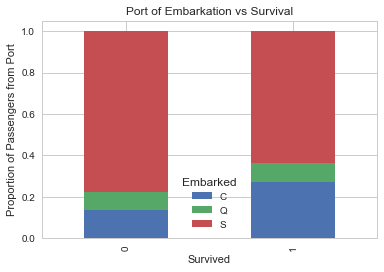

In [37]:
# Compare port of embarkation proportions for survival outcomes
table_embark = pd.crosstab(titanic.Survived, titanic.Embarked)
table_embark_prop = table_embark.div(table_embark.sum(1), axis=0).plot.bar(stacked=True)
plt.title('Port of Embarkation vs Survival')
plt.ylabel('Proportion of Passengers from Port')
plt.show()

### Initial Observations

- There were more passengers that did not survive than those that did
- The average ticket class was higher (meaning a lower socioeconomic class) for those who did not survive compared to those who did
- The average age and number of siblings or spouses aboard were higher for those who did not survive
- The average number of parents/ children aboard and value of the fare paid were lower for those who did not survive
- A higher proportion of females survived compared to males
- A higher proportion of passengers who embarked from Cherbourg appear have survived vs not survived, and a lower proportion of passengers from Southampton appear to have survived vs not survived

# Data Analysis

To analyze the data I will perform a logistic regression on the data, with 'Survived' as the dependent variable and ticket class, sex, age, number of siblings/ spouses aboard, number of parents/ children aboard, passenger fare, and port of embarkation as the independent variables.